In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

In [3]:
result_files = glob.glob("../src/dist/output/*.json")
result_data = []
files = []
for file in result_files:
    with open(file, "r") as f:
        result_data.append(json.load(f))
        files.append(file)
result_files = files

: 

In [ ]:
def get_data_by_filenames(filenames):
    result_datas = []
    for filename in filenames:
        for i, f in enumerate(result_files):
            if filename in f:
                result_datas.append(result_data[i])
                break
    return result_datas

In [ ]:
def get_node_load_data(simulationData):
    nodeTimeStepData = [timeStepData["nodeStates"] for timeStepData in simulationData["simulationData"]["timeStepData"]]
    return nodeTimeStepData

In [ ]:
# [file][node][time]の配列に変換
def convert_node_load(show_files):
    data = get_data_by_filenames(show_files)
    load_data_list = []
    for d in data:
        node_data = get_node_load_data(d)
        load_data = []
        for j in range(len(node_data[0])):
            load_data_per_node = []
            for i in range(len(node_data)):
                load_data_per_node.append(node_data[i][j]["load"])
            load_data.append(load_data_per_node)  
        load_data_list.append(load_data)   
    return load_data_list

In [ ]:
def get_user_connection_data(simulationData):
    userTimeStepData = [timeStepData["userStates"] for timeStepData in simulationData["simulationData"]["timeStepData"]]
    return userTimeStepData

In [ ]:
# [file][time][user]の配列
def convert_user_connection(show_files):
    data = get_data_by_filenames(show_files)
    user_data_list = []
    for d in data:
        user_data = get_user_connection_data(d)
        user_connection_data = []
        for timeStepData in user_data:
            user_connection_list_per_step = []
            for user in timeStepData:
                user_connection_list_per_step.append(user["connectedNodeId"])
            user_connection_data.append(user_connection_list_per_step)
        user_data_list.append(user_connection_data)
    return user_data_list


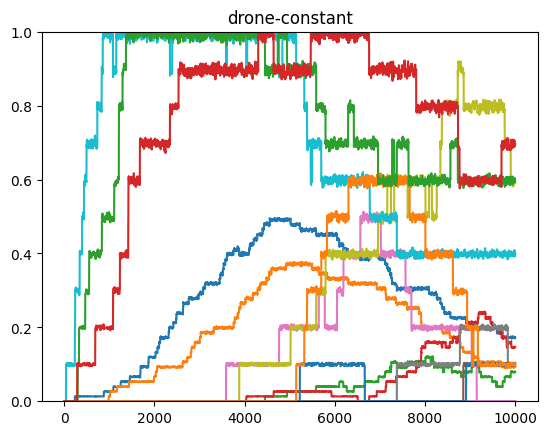

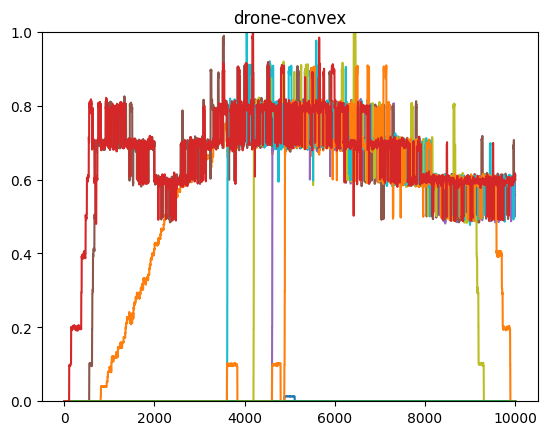

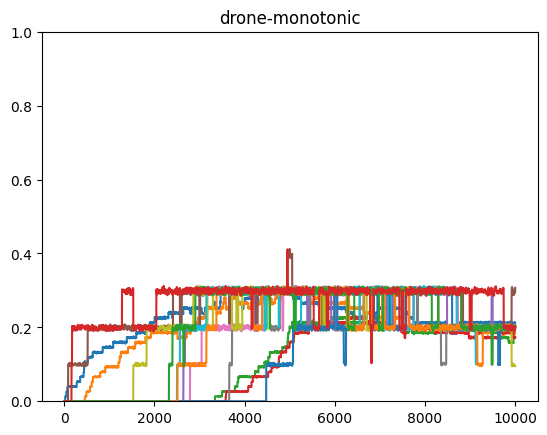

In [ ]:
show_files = ["drone-constant-1000", "drone-convex-1000", "drone-monotonic-1000"]
load_data_list = convert_node_load(show_files)
for i, load_data in enumerate(load_data_list):
    for node in load_data:
        plt.plot(node)
    plt.ylim(0,1)
    plt.title(show_files[i])
    plt.show()

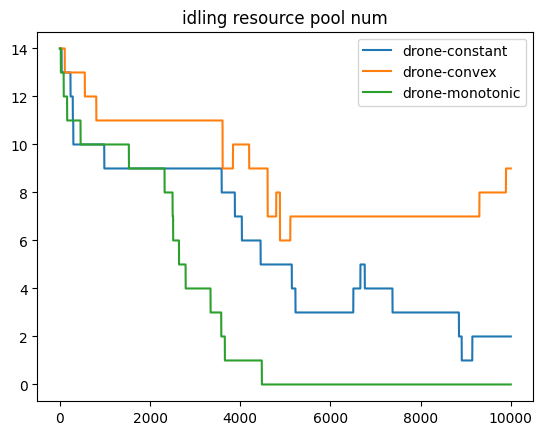

In [ ]:
show_files = ["drone-constant-1000", "drone-convex-1000", "drone-monotonic-1000"]
load_data_list = convert_node_load(show_files)
for i, load_data in enumerate(load_data_list):
    idling_resource_num = []
    for j in range(len(load_data[0])):
        idling_resource_num.append(0)
    for j in range(len(load_data[0])):
        for k in range(len(load_data)):
            if load_data[k][j] == 0:
                idling_resource_num[j] += 1
    plt.plot(idling_resource_num, label=show_files[i])
plt.title("idling resource pool")    
plt.legend()
plt.show()

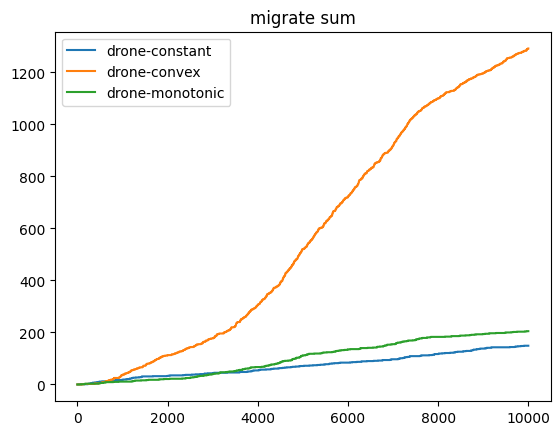

In [ ]:
show_files = ["drone-constant-1000", "drone-convex-1000", "drone-monotonic-1000"]
get_user_connection_data_list = convert_user_connection(show_files)
for i, connection_data in enumerate(get_user_connection_data_list):
    migrate_sum_list = []
    migrate_sum = 0
    connect_node_list = [-1] * len(connection_data[0])
    for time_step_data in connection_data:
        for k in range(len(time_step_data)):
            if (connect_node_list[k] == -1) or (connect_node_list[k] == time_step_data[k]):
                pass
            else :
                migrate_sum +=1
            connect_node_list[k] = time_step_data[k]
        migrate_sum_list.append(migrate_sum)
    plt.plot(migrate_sum_list, label=show_files[i])
plt.title("migrate sum")    
plt.legend()
plt.show()